## Random Forest

### Let's import the libraries needed

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
row_names = ["Age", "Workclass", "Fnlwgt", "Education", "EducationNum", "MaritalStatus",
        "Occupation", "Relationship", "Race", "Gender", "CapitalGain", "CapitalLoss",
        "HoursPerWeek", "Country", "Income"]
us_adult_income = pd.read_csv(dataset, names=row_names,na_values=[' ?'])
us_adult_income.head(5)

,Age,Workclass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
us_adult_income.describe()

,Age,Fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Distribution of educational attainment

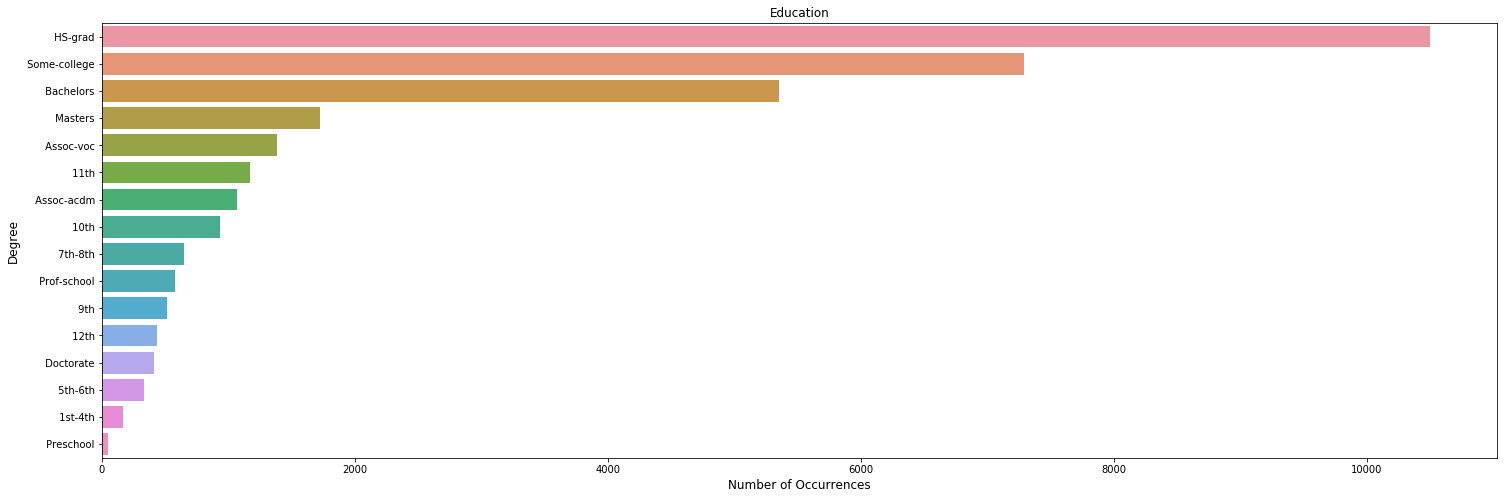

In [7]:
plt.figure(figsize=(25,8))
sns.countplot(y='Education', data = us_adult_income, order = us_adult_income.Education.value_counts().index)
plt.title('Education')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Degree', fontsize=12)
plt.show()

### Job title Distribution

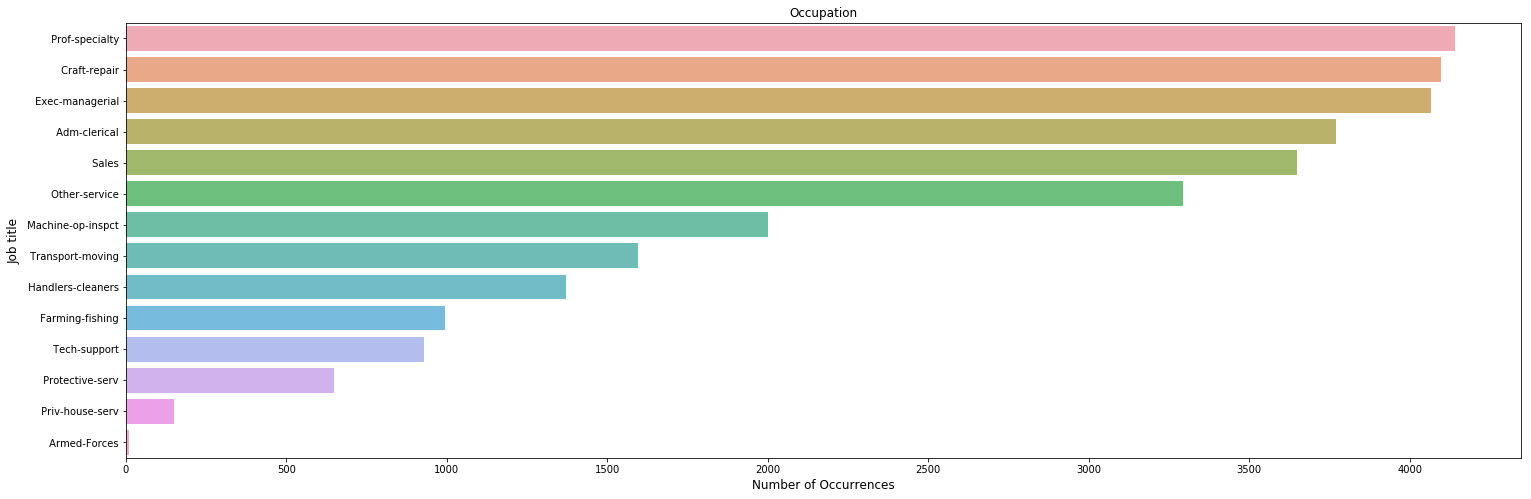

In [8]:
plt.figure(figsize=(25,8))
sns.countplot(y='Occupation',order= us_adult_income.Occupation.value_counts().index, alpha=0.8,data = us_adult_income)
plt.title('Occupation')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Job title', fontsize=12)
plt.show()

### Countries Distribution

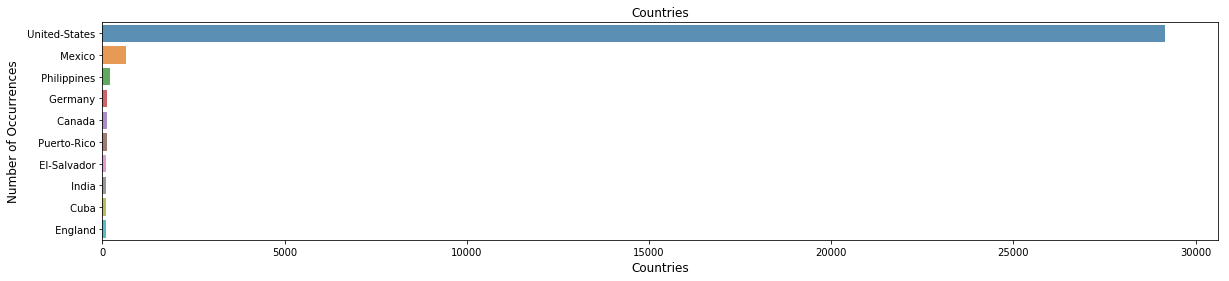

In [9]:
plt.figure(figsize=(20,4))
sns.countplot(y='Country',order=us_adult_income.Country.value_counts().index[:10], alpha=0.8,data = us_adult_income)
plt.title('Countries')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Countries', fontsize=12)
plt.show()

### Race Distribution

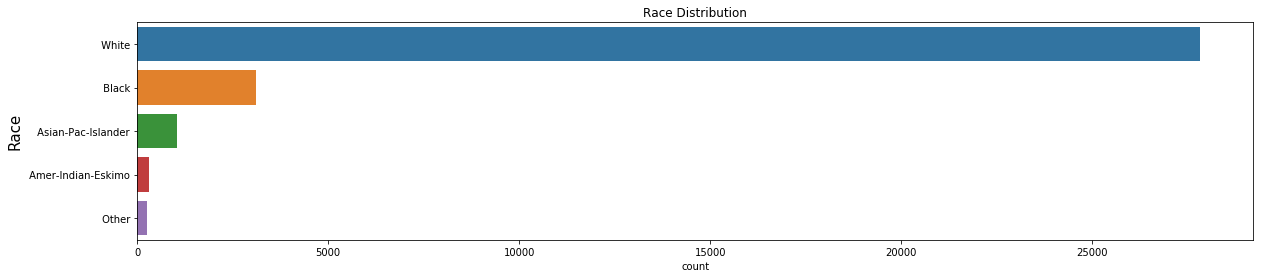

In [10]:
plt.figure(figsize=(20,4))
plt.title('Race Distribution')
plt.ylabel('Race', fontsize=15)
sns.countplot(y = 'Race', data=us_adult_income)

### Gender vs Income

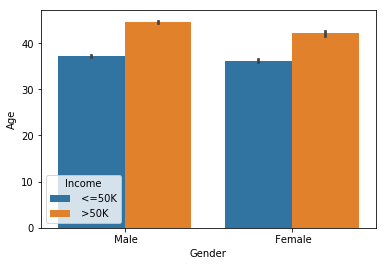

In [11]:
sns.barplot(x = 'Gender',y='Age' ,hue='Income', data=us_adult_income)

### Box plot for hours per week grouped by gender vs Income

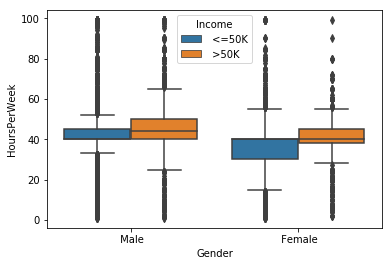

In [12]:
sns.boxplot(x = 'Gender',y='HoursPerWeek' ,hue='Income', data=us_adult_income)

### Education vs Income

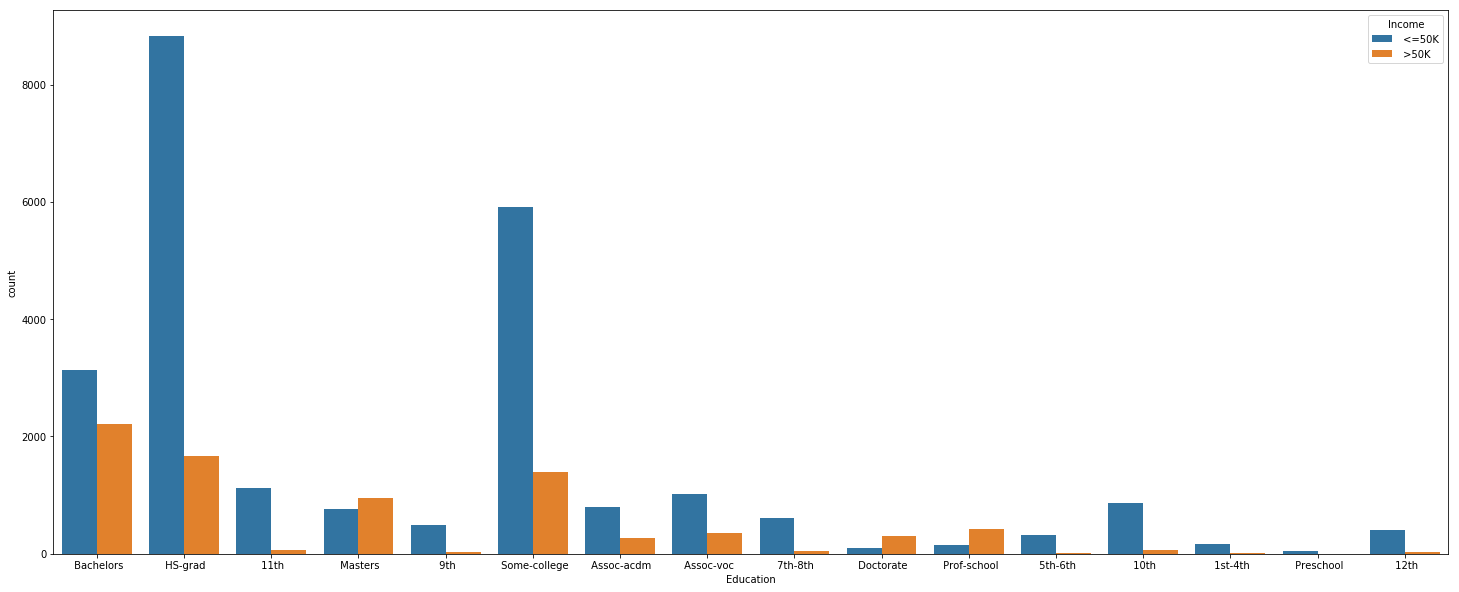

In [13]:
plt.figure(figsize=(25,10))
sns.countplot(x = 'Education',hue='Income', data=us_adult_income)

### Occupation vs Income

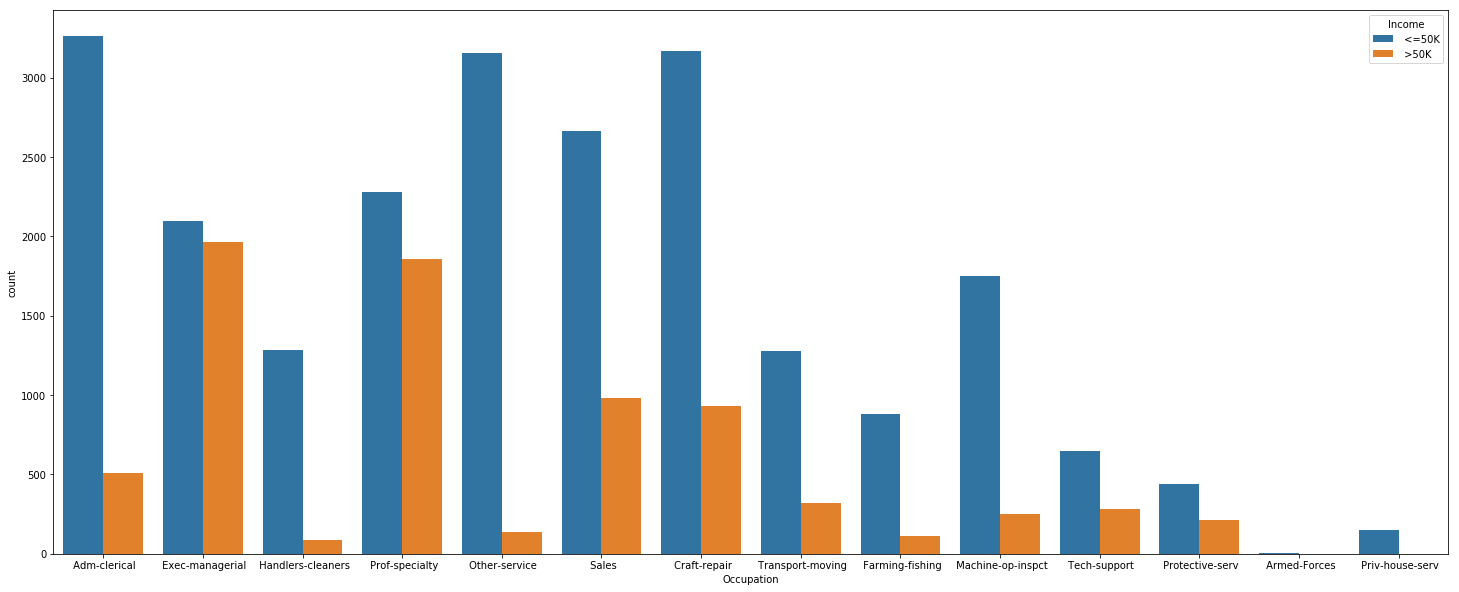

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(x = 'Occupation',hue='Income', data=us_adult_income)

### Marital Status vs Income

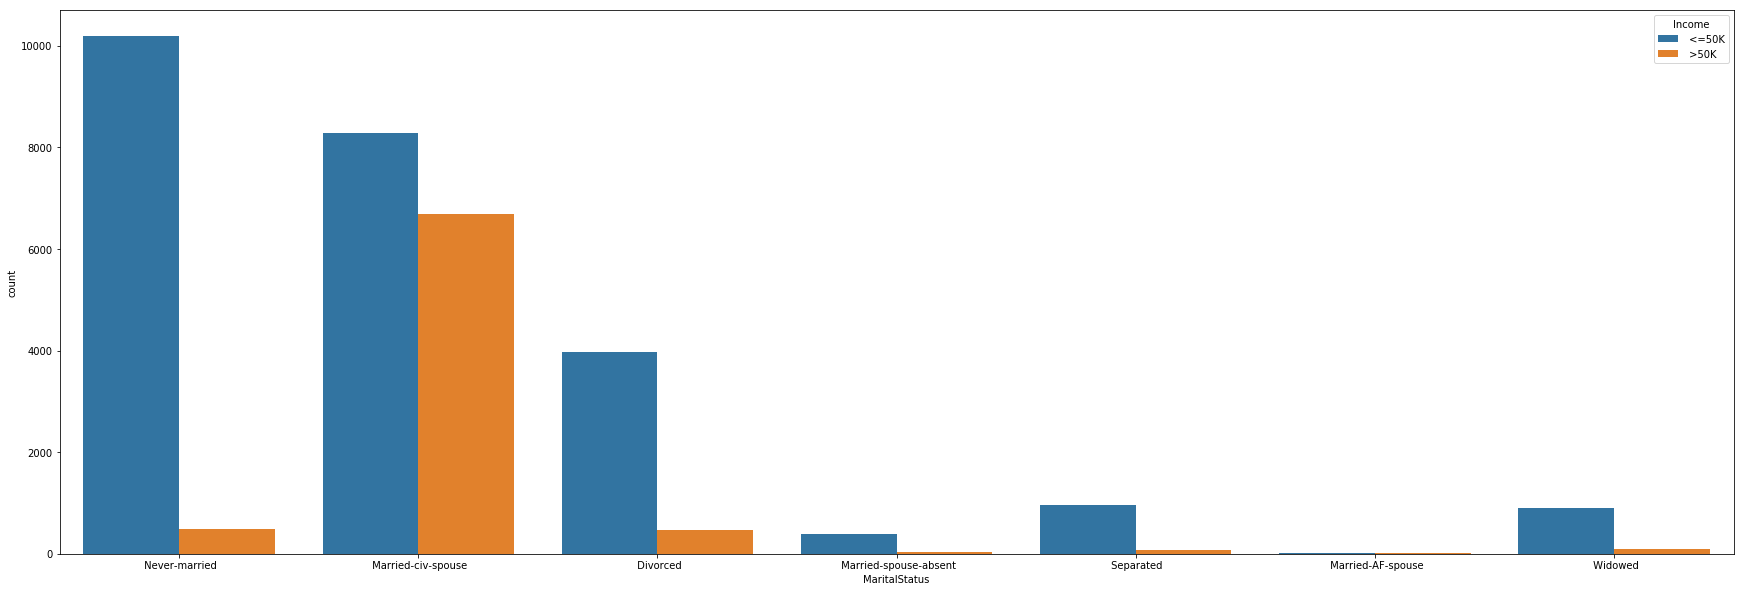

In [15]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'MaritalStatus',hue='Income', data=us_adult_income)

### Work-class vs Income

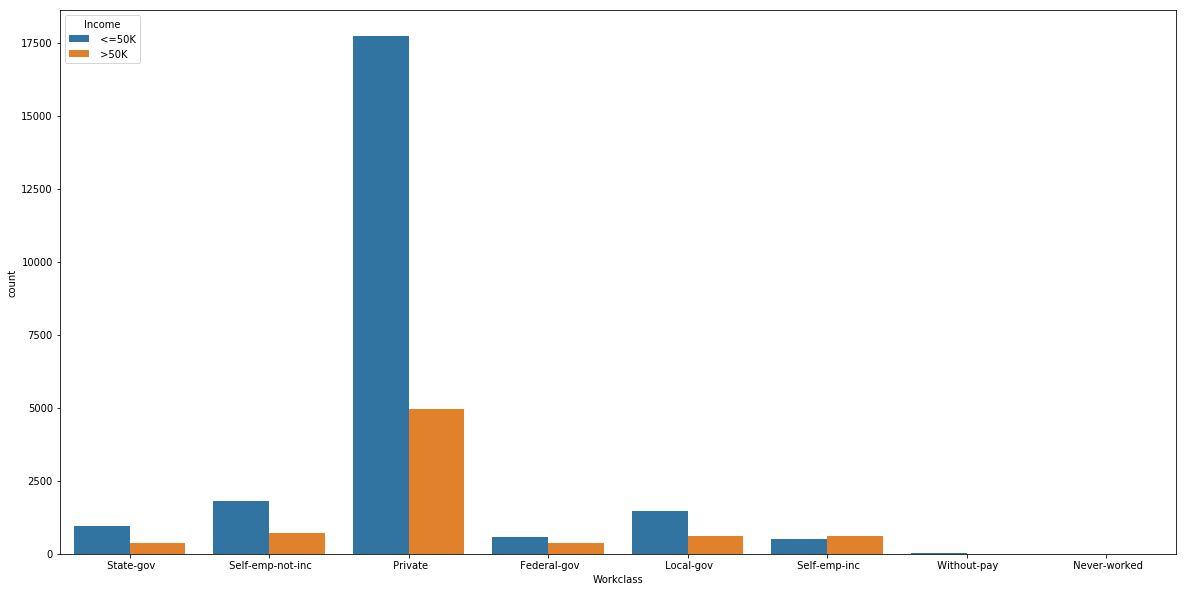

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Workclass',hue='Income', data=us_adult_income)

### Age vs Income

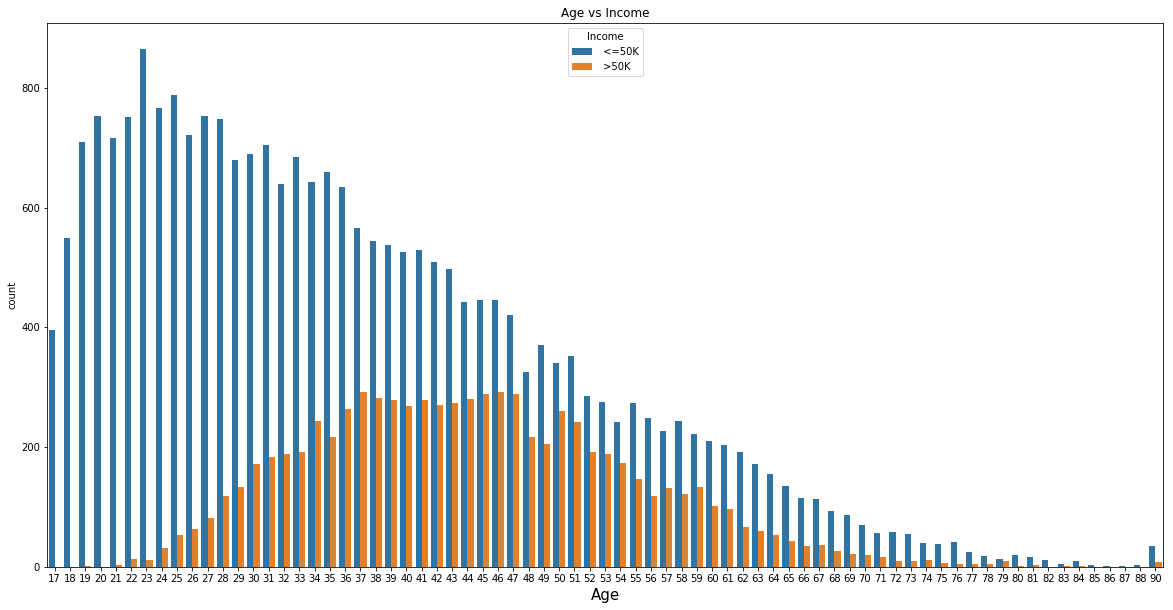

In [17]:
plt.figure(figsize=(20,10))
plt.title('Age vs Income')
plt.xlabel('Age', fontsize=15)
sns.countplot(x = 'Age',hue='Income', data=us_adult_income)

### Race vs Income

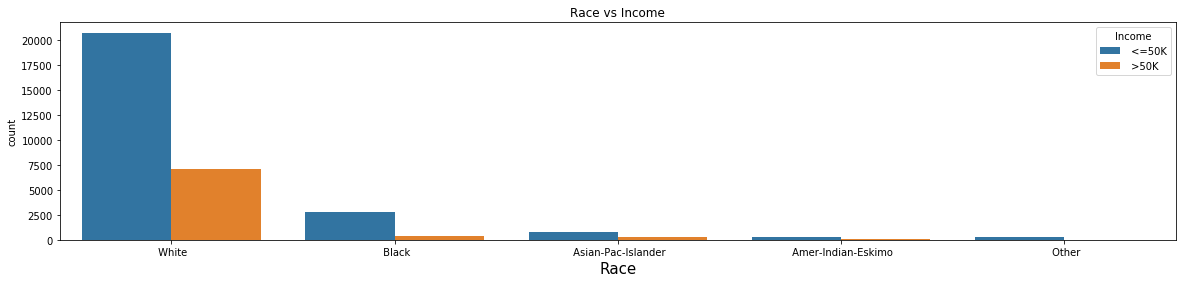

In [18]:
plt.figure(figsize=(20,4))
plt.title('Race vs Income')
plt.xlabel('Race', fontsize=15)
sns.countplot(x = 'Race',hue='Income', data=us_adult_income)

### Income Distribution vs Age

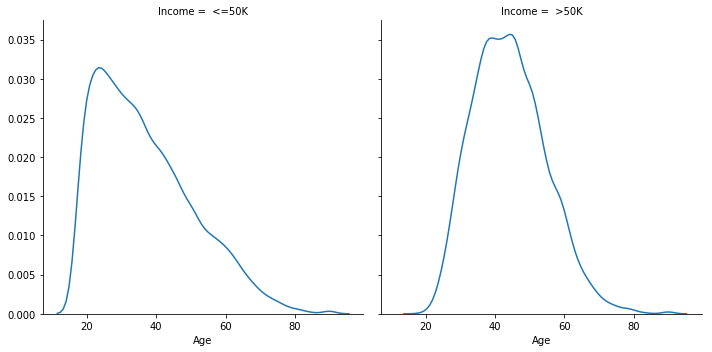

In [19]:
density = sns.FacetGrid(us_adult_income, col = "Income",height=5)
density.map(sns.kdeplot, "Age")

### Correlation Heat map

Text(0.5, 0.98, 'US DATA INCOME Correlation Heatmap')

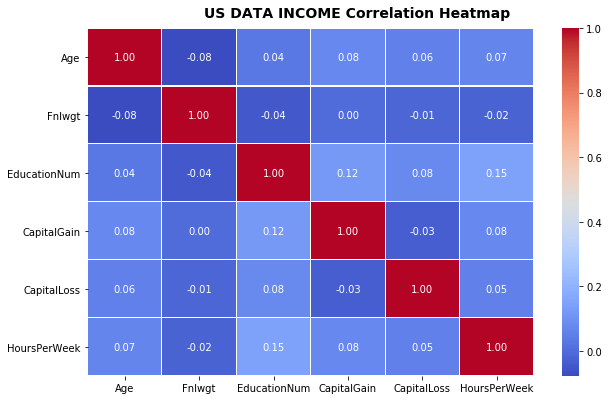

In [20]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(us_adult_income.corr(),
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True,
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('US DATA INCOME Correlation Heatmap',
              fontsize=14,
              fontweight='bold')


In [21]:
#Since Education Num and Education are the same we are only going to keep the quantitive variable.
del us_adult_income['Education']

### Nan Values in our dataset

In [22]:
us_adult_income.isnull().sum()

Age                 0
Workclass        1836
Fnlwgt              0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
Country           583
Income              0
dtype: int64

### Let's see how many values belong to each class

In [23]:
us_adult_income.Income.value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

### Encoding

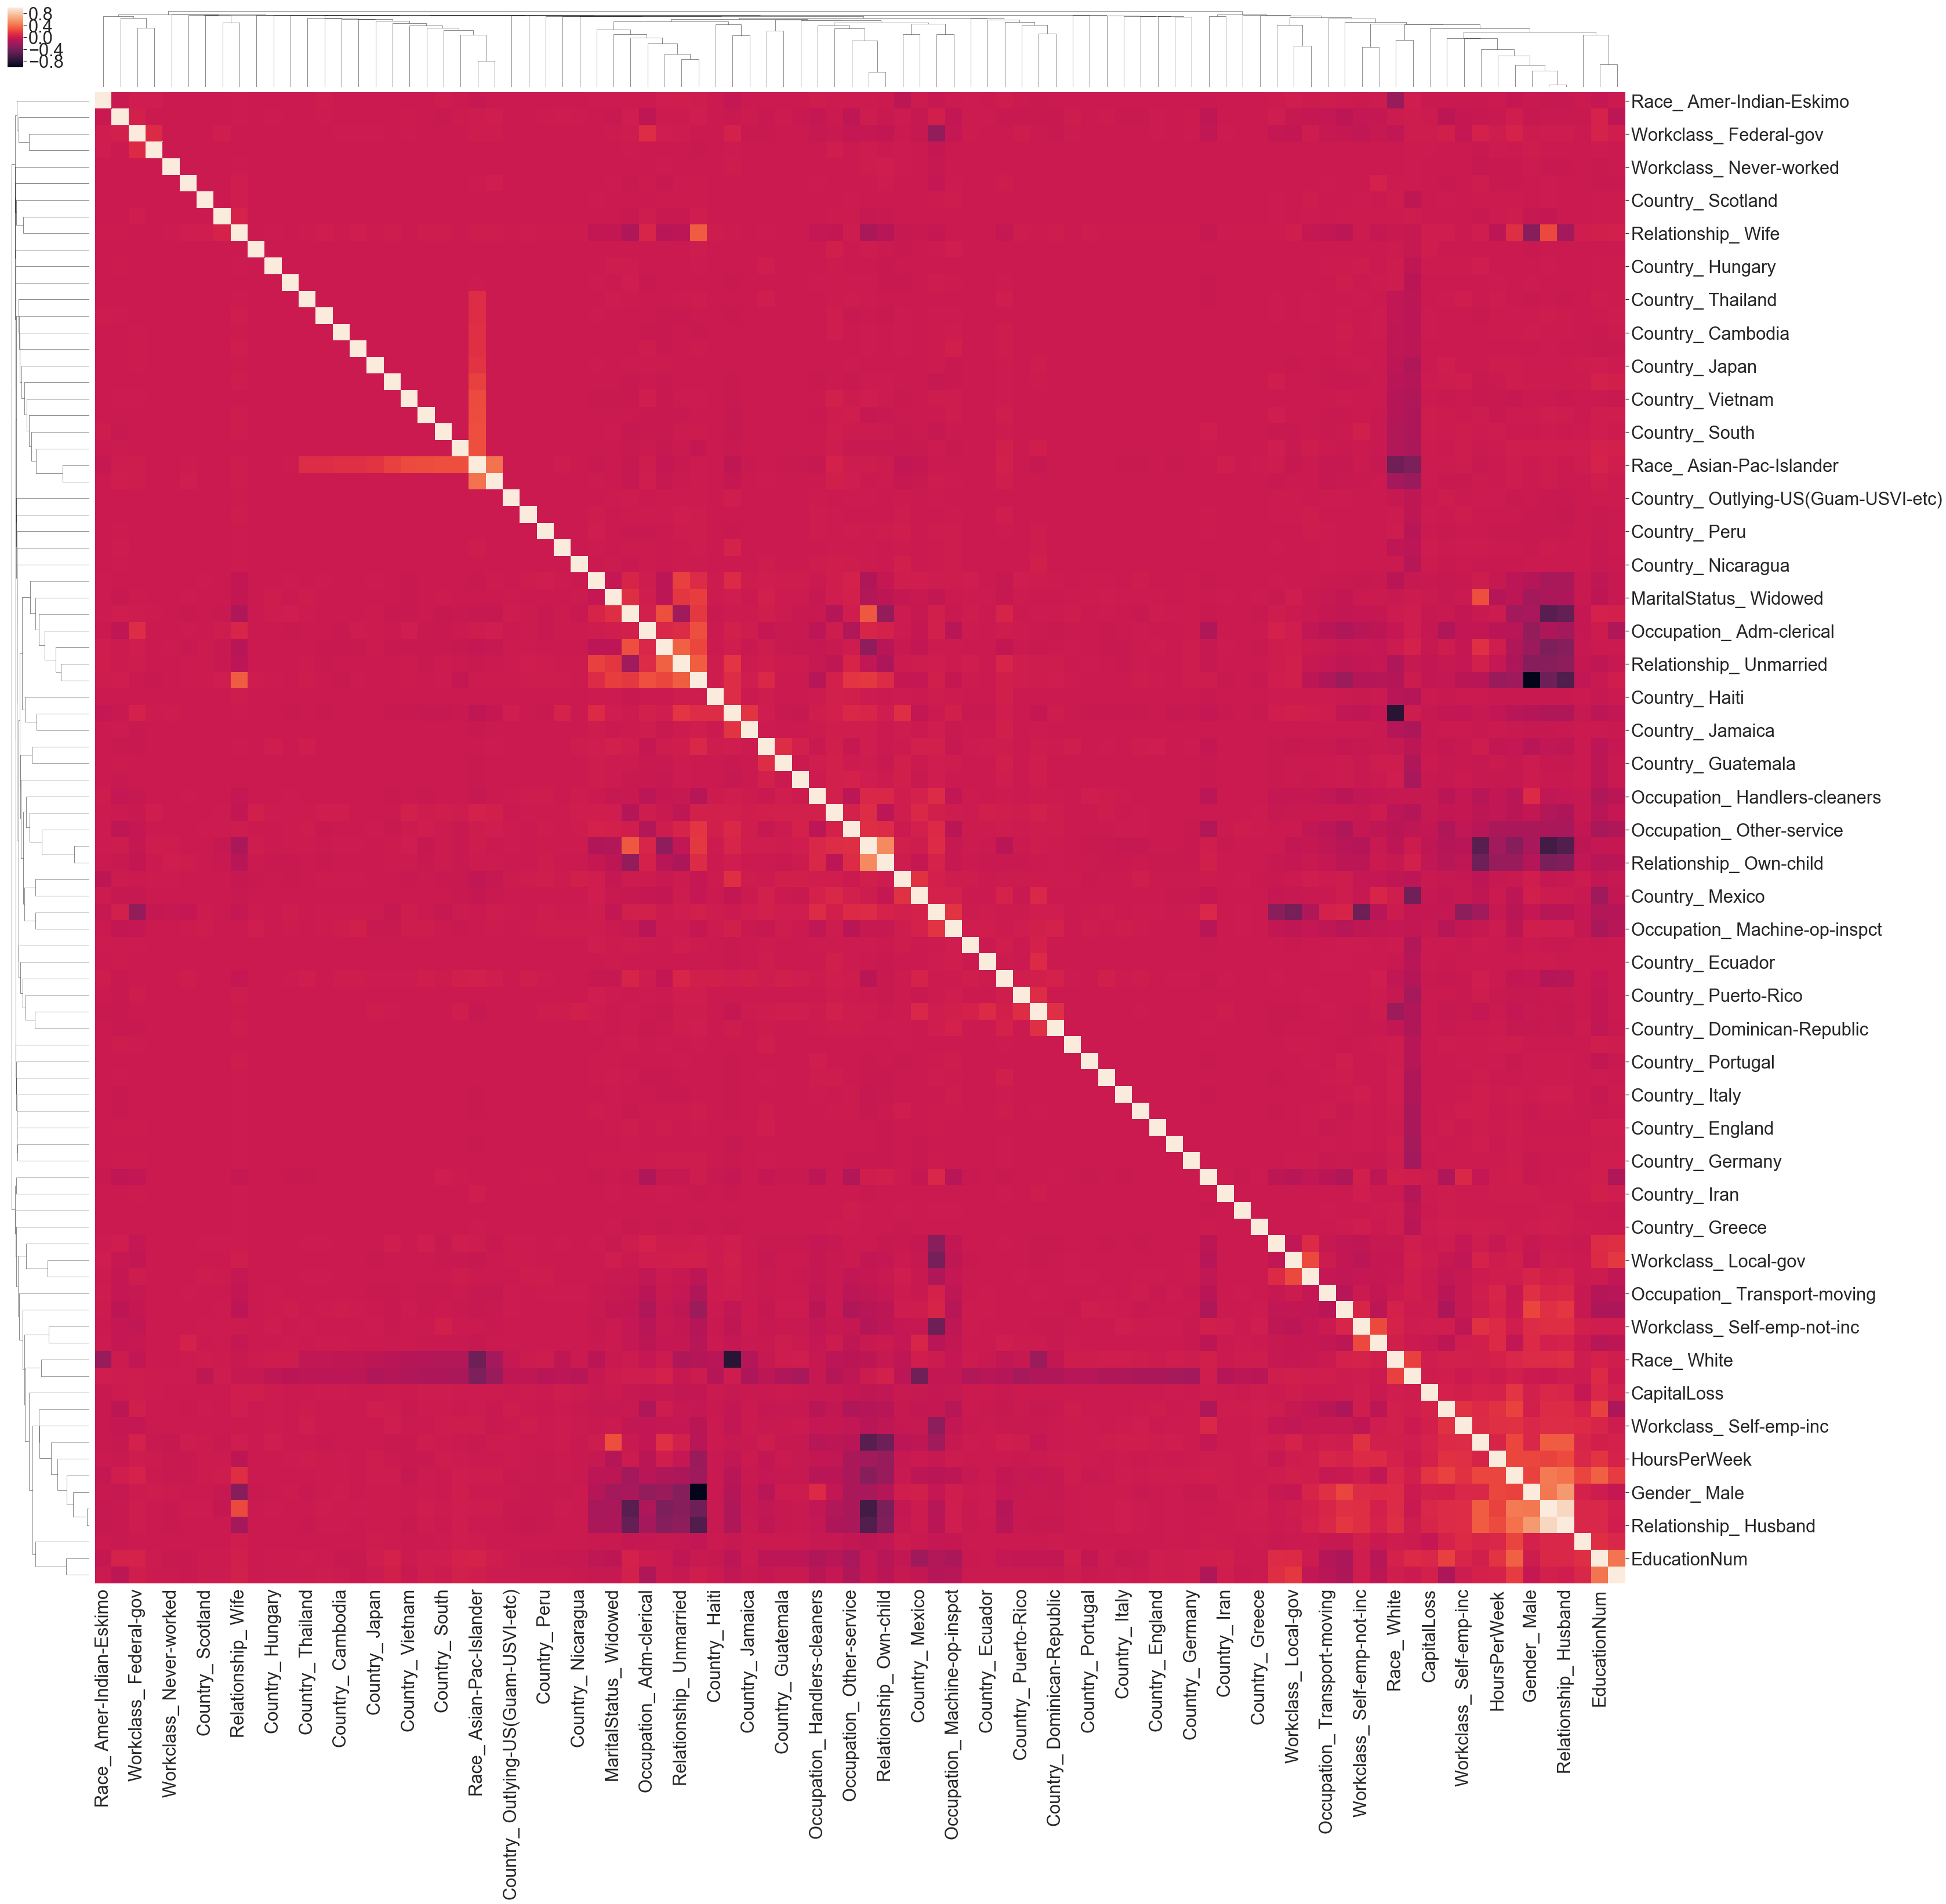

In [24]:
#We encode the categorical variables in order to train our model. We replace the missing values with the statistical mean of each column.

one_hot_encoding = pd.get_dummies(us_adult_income)
one_hot_encoding.fillna(one_hot_encoding .mean(),inplace=True)
one_hot_encoding["Income"] = one_hot_encoding['Income_ >50K']
del one_hot_encoding['Income_ <=50K']
del one_hot_encoding['Income_ >50K']
sns.set(font_scale=2.8)
sns.clustermap(one_hot_encoding.corr(), metric="correlation",figsize=(50, 50))

### Split the dataset into train and testing

In [25]:
X = one_hot_encoding.iloc[:,0:-1]
y = one_hot_encoding.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

### Random Forest Classifier

In [26]:
rf = RandomForestClassifier(max_depth=25,n_estimators=200, min_samples_leaf=1,min_samples_split=50,criterion='entropy', oob_score=True,random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

### Estimation

In [27]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.864
Mean accuracy score: 0.87


### Confusion Matrix

[Text(0, 0.5, 'Income > 50 K'), Text(0, 1.5, 'Income < 50 K')]

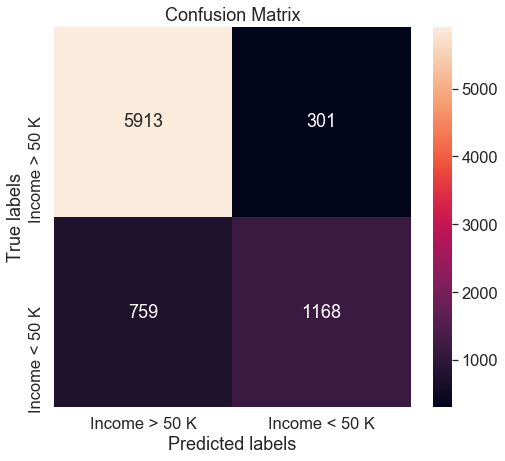

In [29]:
cm = confusion_matrix(y_test, predicted)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])